# 1.   Setting up the environment





### 1.   Mounting HD


In [ ]:
# setting up the dataset
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Data_Intensive
! pip install kaggle
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

Mounted at /gdrive
/gdrive/MyDrive/Data_Intensive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle competitions download -c eurecom-aml-2022-challenge-1

eurecom-aml-2022-challenge-1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# !unzip eurecom-aml-2022-challenge-1.zip



### 2.   Installing libraries


In [ ]:
!pip install pyspark
!pip install -q findspark
!pip install pandas
!pip install geopandas
!pip install matplotlib
!pip install pyspark_dist_explore
!pip install mapclassify
!sudo apt install libspatialindex-dev
!pip install rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 46 kB/s 
     |████████████████████████████████| 199 kB 69.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=2f5bc345a68c71753d57b39fd0fcfd88648c504c4fbcfd0943f863c9c64b4cf2
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 49.7 MB/s 
     |████████████████████████████████| 16.7 MB 40.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: 



```
# This is formatted as code
```



### 3.   Importing libraries


In [ ]:
# importing libraries
import pyspark
import findspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pyspark.ml.stat import Correlation
import seaborn as sns 
from pyspark.ml.feature import PCA, PCAModel, StandardScaler,StandardScalerModel,VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.mllib.util import MLUtils
from pyspark_dist_explore import hist
from pyspark.sql.functions import monotonically_increasing_id, row_number
from pyspark.sql.window import Window
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator, RegressionEvaluator
from pyspark import SparkConf, SparkContext
from pyspark.ml import Pipeline
import folium
import numpy as np



### 4.   Starting spark


In [ ]:
findspark.init()
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
sc = SparkContext.getOrCreate(SparkConf())
spark

# 2.   Processing data

### 1.   Loading data

In [ ]:
df = spark.read.csv('public/train.csv', header=True, sep=",").limit(100000)
df

index,fact_time,fact_latitude,fact_longitude,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_6_2,cmc_0_0_7_1000,cmc_0_0_7_2,cmc_0_0_7_500,cmc_0_0_7_700,cmc_0_0_7_850,cmc_0_0_7_925,cmc_0_1_0_0,cmc_0_1_11_0,cmc_0_1_65_0,cmc_0_1_66_0,cmc_0_1_67_0,cmc_0_1_68_0,cmc_0_1_7_0,cmc_0_2_2_10,cmc_0_2_2_1000,cmc_0_2_2_500,cmc_0_2_2_700,cmc_0_2_2_850,cmc_0_2_2_925,cmc_0_2_3_10,cmc_0_2_3_1000,cmc_0_2_3_500,cmc_0_2_3_700,cmc_0_2_3_850,cmc_0_2_3_925,cmc_0_3_0_0,cmc_0_3_0_0_next,cmc_0_3_1_0,cmc_0_3_5_1000,cmc_0_3_5_500,cmc_0_3_5_700,cmc_0_3_5_850,cmc_0_3_5_925,cmc_0_6_1_0,cmc_available,cmc_horizon_h,cmc_precipitations,cmc_timedelta_s,gfs_2m_dewpoint,gfs_a_vorticity,gfs_available,gfs_cloudness,gfs_clouds_sea,gfs_horizon_h,gfs_humidity,gfs_precipitable_water,gfs_precipitations,gfs_pressure,gfs_r_velocity,gfs_soil_temperature,gfs_soil_temperature_available,gfs_temperature_5000,gfs_temperature_7000,gfs_temperature_10000,gfs_temperature_15000,gfs_temperature_20000,gfs_temperature_25000,gfs_temperature_30000,gfs_temperature_35000,gfs_temperature_40000,gfs_temperature_45000,gfs_temperature_50000,gfs_temperature_55000,gfs_temperature_60000,gfs_temperature_65000,gfs_temperature_70000,gfs_temperature_75000,gfs_temperature_80000,gfs_temperature_85000,gfs_temperature_90000,gfs_temperature_92500,gfs_temperature_95000,gfs_temperature_97500,gfs_timedelta_s,gfs_total_clouds_cover_high,gfs_total_clouds_cover_low,gfs_total_clouds_cover_middle,gfs_u_wind,gfs_v_wind,gfs_wind_speed,wrf_available,wrf_t2_next,wrf_psfc,wrf_rh2,wrf_wind_u,wrf_wind_v,wrf_rain,wrf_snow,wrf_graupel,wrf_t2_interpolated,wrf_t2_grad,cmc_0_1_65_0_grad,cmc_0_1_65_0_next,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next,fact_temperature
0,1538665200.0,42.696693,23.411436,532.0,11.43610943566094,15.718571428571456,694.9703184604175,279.9845886230469,10.375,7.625,3.8146942108869553,0.875,4.0,8.625,0.0071,0.0,0.89575,0.0,0.0,0.0,0.0,-0.07496337890625,-0.0683380126953125,9.826770019531253,7.865277099609376,0.399005126953125,0.0338897705078125,0.6262145996093751,0.9217330932617188,-1.6661590576171876,-0.4704620361328125,-1.0045928955078125,0.5313293457031251,93378.39453125,93478.56640625,102425.03125,204.37612915039065,5804.65869140625,3157.68798828125,1572.7769165039062,867.2584381103516,48.0,1.0,87.0,0.0,0.0,0.7499938964843977,0.0001254637463716,1.0,0.0,0.0,75.0,28.5,10.600000381469728,0.0,712.4136606299036,-0.0593510754406452,19.350000000000023,1.0,-57.95000305175779,-59.24999084472654,-60.04999389648435,-62.349996948242165,-60.750021362304665,-52.74999084472654,-43.16770019531248,-34.45001831054685,-26.45000305175779,-19.24999084472654,-13.250006103515602,-8.184271240234352,-4.093908691406227,-0.8806823730468523,1.860040283203148,4.650018310546898,6.038079833984398,9.850000000000025,14.559991455078148,16.860040283203148,19.160028076171898,20.650018310546898,0.0,0.0,0.0,0.0,0.7020507454872131,-2.346186399459839,2.448972411083774,1.0,290.2991027832031,96175.375,0.3702570773255965,-1.3419654420089555,-1.7392265947754524,0.0,0.0,0.0,292.8719482421875,-2.572845458984375,0.0,0.89575,0.0,0.0,0.0,0.0,0.0,0.0,0.058990478515625,0.8089843750000227,0.0,0.0,19.0
1,1539435600.0,51.447778,4.341944,20.0,26.956421151492897,12.511428571428594,759.9731312416958,288.6064453125,8.375,8.375,15.508391499519348,10.0,5.125,7.0,0.0117,0.0,0.0,0.0,0.0,0.0,0.0,-0.99765625,-0.8972717285156251,2.270404052734375,4.573150634765625,5.400204467773438,1.2065490722656251,6.233512878417969,8.901039123535156,13.719110107421876,12.597430419921876,14.793621826171876,13.49493408203125,101496.75390625,101286.36328125,101531.5859375,132.70852661132812,5808.0205078125,3134.54931640625,1526.3150634765625,806.7194519042969,8.0,1.0,12.0,0.0,3600.0,15.801995849609398,9.450561628909782...,1.0,0.74,0.0,12.0,62.8409538269043,29.700000762939453,0.0,761.

### 2.   Visualizing information

In [ ]:
df.printSchema()

root
 |-- index: string (nullable = true)
 |-- fact_time: string (nullable = true)
 |-- fact_latitude: string (nullable = true)
 |-- fact_longitude: string (nullable = true)
 |-- topography_bathymetry: string (nullable = true)
 |-- sun_elevation: string (nullable = true)
 |-- climate_temperature: string (nullable = true)
 |-- climate_pressure: string (nullable = true)
 |-- cmc_0_0_6_2: string (nullable = true)
 |-- cmc_0_0_7_1000: string (nullable = true)
 |-- cmc_0_0_7_2: string (nullable = true)
 |-- cmc_0_0_7_500: string (nullable = true)
 |-- cmc_0_0_7_700: string (nullable = true)
 |-- cmc_0_0_7_850: string (nullable = true)
 |-- cmc_0_0_7_925: string (nullable = true)
 |-- cmc_0_1_0_0: string (nullable = true)
 |-- cmc_0_1_11_0: string (nullable = true)
 |-- cmc_0_1_65_0: string (nullable = true)
 |-- cmc_0_1_66_0: string (nullable = true)
 |-- cmc_0_1_67_0: string (nullable = true)
 |-- cmc_0_1_68_0: string (nullable = true)
 |-- cmc_0_1_7_0: string (nullable = true)
 |-- cmc_0_

In [ ]:
#printing the number of rows
df.count()

100000

In [ ]:
# Get columns count
cols = len(df.columns)
print(f"DataFrame Columns count : {cols}")


DataFrame Columns count : 113


### 3.   Removing null values

In [ ]:
# checking for None values
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()


+-----+---------+-------------+--------------+---------------------+-------------+-------------------+----------------+-----------+--------------+-----------+-------------+-------------+-------------+-------------+-----------+------------+------------+------------+------------+------------+-----------+------------+--------------+-------------+-------------+-------------+-------------+------------+--------------+-------------+-------------+-------------+-------------+-----------+----------------+-----------+--------------+-------------+-------------+-------------+-------------+-----------+-------------+-------------+------------------+---------------+---------------+---------------+-------------+-------------+--------------+-------------+------------+----------------------+------------------+------------+--------------+--------------------+------------------------------+--------------------+--------------------+---------------------+---------------------+---------------------+----------

In [ ]:
# checking for null values
null_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
null_values.show()

+-----+---------+-------------+--------------+---------------------+-------------+-------------------+----------------+-----------+--------------+-----------+-------------+-------------+-------------+-------------+-----------+------------+------------+------------+------------+------------+-----------+------------+--------------+-------------+-------------+-------------+-------------+------------+--------------+-------------+-------------+-------------+-------------+-----------+----------------+-----------+--------------+-------------+-------------+-------------+-------------+-----------+-------------+-------------+------------------+---------------+---------------+---------------+-------------+-------------+--------------+-------------+------------+----------------------+------------------+------------+--------------+--------------------+------------------------------+--------------------+--------------------+---------------------+---------------------+---------------------+----------

In [ ]:
# distinct values in the dataset
print("Distinct Count: " + str(df.distinct().count()))

Distinct Count: 100000


### 4.   Converting column types to float

In [ ]:
# converting features to numerical values
df_numerical = df.select(*(col(c).cast("float").alias(c) for c in df.columns))


In [ ]:
df_numerical.printSchema()

root
 |-- index: float (nullable = true)
 |-- fact_time: float (nullable = true)
 |-- fact_latitude: float (nullable = true)
 |-- fact_longitude: float (nullable = true)
 |-- topography_bathymetry: float (nullable = true)
 |-- sun_elevation: float (nullable = true)
 |-- climate_temperature: float (nullable = true)
 |-- climate_pressure: float (nullable = true)
 |-- cmc_0_0_6_2: float (nullable = true)
 |-- cmc_0_0_7_1000: float (nullable = true)
 |-- cmc_0_0_7_2: float (nullable = true)
 |-- cmc_0_0_7_500: float (nullable = true)
 |-- cmc_0_0_7_700: float (nullable = true)
 |-- cmc_0_0_7_850: float (nullable = true)
 |-- cmc_0_0_7_925: float (nullable = true)
 |-- cmc_0_1_0_0: float (nullable = true)
 |-- cmc_0_1_11_0: float (nullable = true)
 |-- cmc_0_1_65_0: float (nullable = true)
 |-- cmc_0_1_66_0: float (nullable = true)
 |-- cmc_0_1_67_0: float (nullable = true)
 |-- cmc_0_1_68_0: float (nullable = true)
 |-- cmc_0_1_7_0: float (nullable = true)
 |-- cmc_0_2_2_10: float (nullabl

In [ ]:
# dropping null values
df_numerical = df_numerical.dropna()

In [ ]:
#checking null values
df_numerical.select([count(when(col(c).isNull(), c)).alias(c) for c in df_numerical.columns]).show()

+-----+---------+-------------+--------------+---------------------+-------------+-------------------+----------------+-----------+--------------+-----------+-------------+-------------+-------------+-------------+-----------+------------+------------+------------+------------+------------+-----------+------------+--------------+-------------+-------------+-------------+-------------+------------+--------------+-------------+-------------+-------------+-------------+-----------+----------------+-----------+--------------+-------------+-------------+-------------+-------------+-----------+-------------+-------------+------------------+---------------+---------------+---------------+-------------+-------------+--------------+-------------+------------+----------------------+------------------+------------+--------------+--------------------+------------------------------+--------------------+--------------------+---------------------+---------------------+---------------------+----------

In [ ]:
print("Rows removed: ",df.count()-df_numerical.count())

Rows removed:  5469


# 3.   Visualization

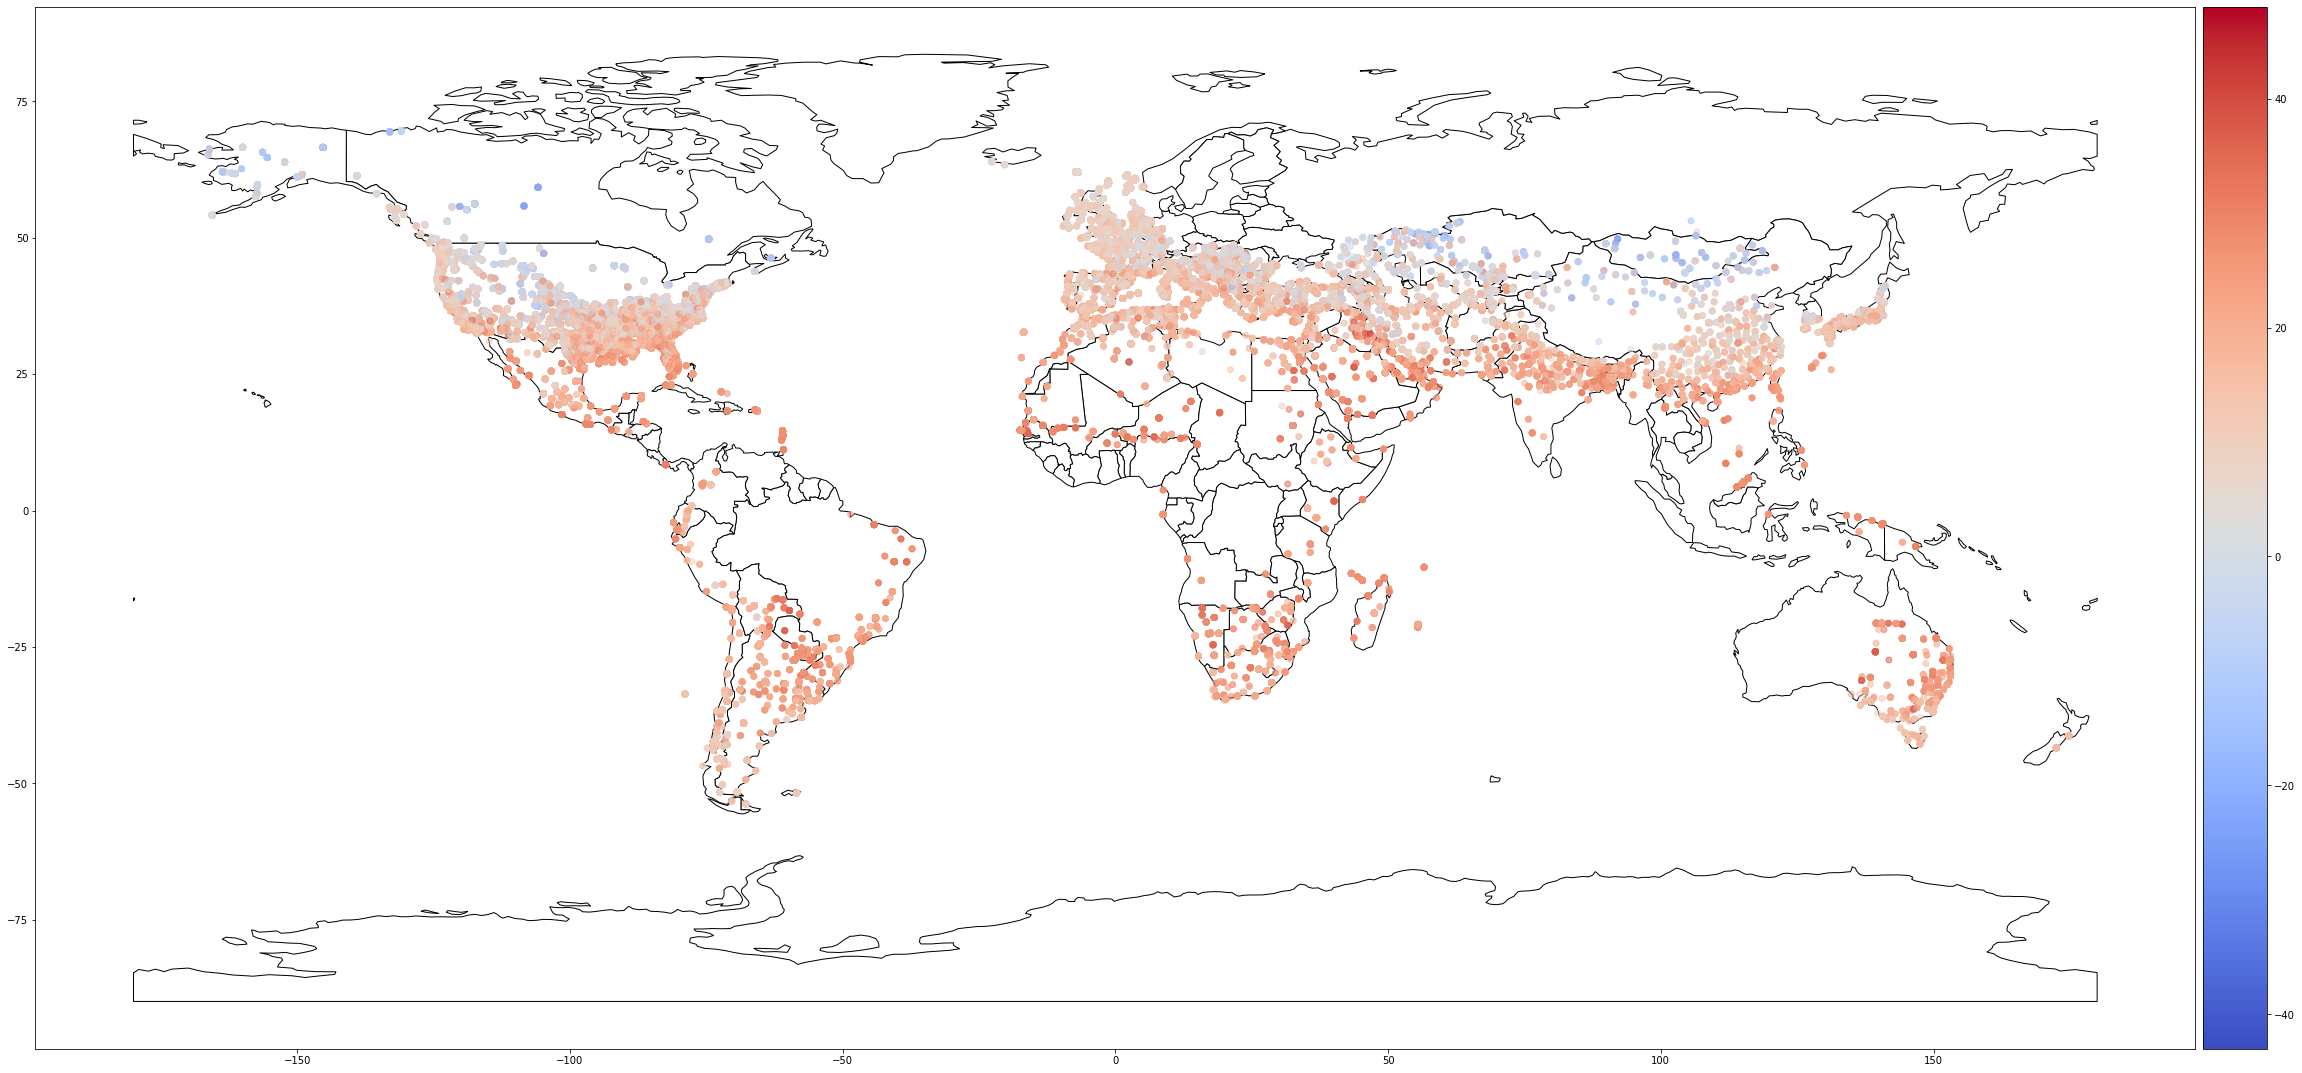

In [ ]:
# Visualizing the temperature

selected_columns = df_numerical.select("fact_latitude","fact_longitude","fact_temperature")
pd_world=selected_columns.toPandas()
gdf = geopandas.GeoDataFrame(
    pd_world, geometry=geopandas.points_from_xy(pd_world.fact_longitude,pd_world.fact_latitude))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(
    color='white', edgecolor='black',figsize=[40,40])
divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="3%", pad=0.1)

gdf.plot(column='fact_temperature', ax=ax, legend=True, cax=cax, cmap="coolwarm",figsize=[40,40],alpha=0.5)


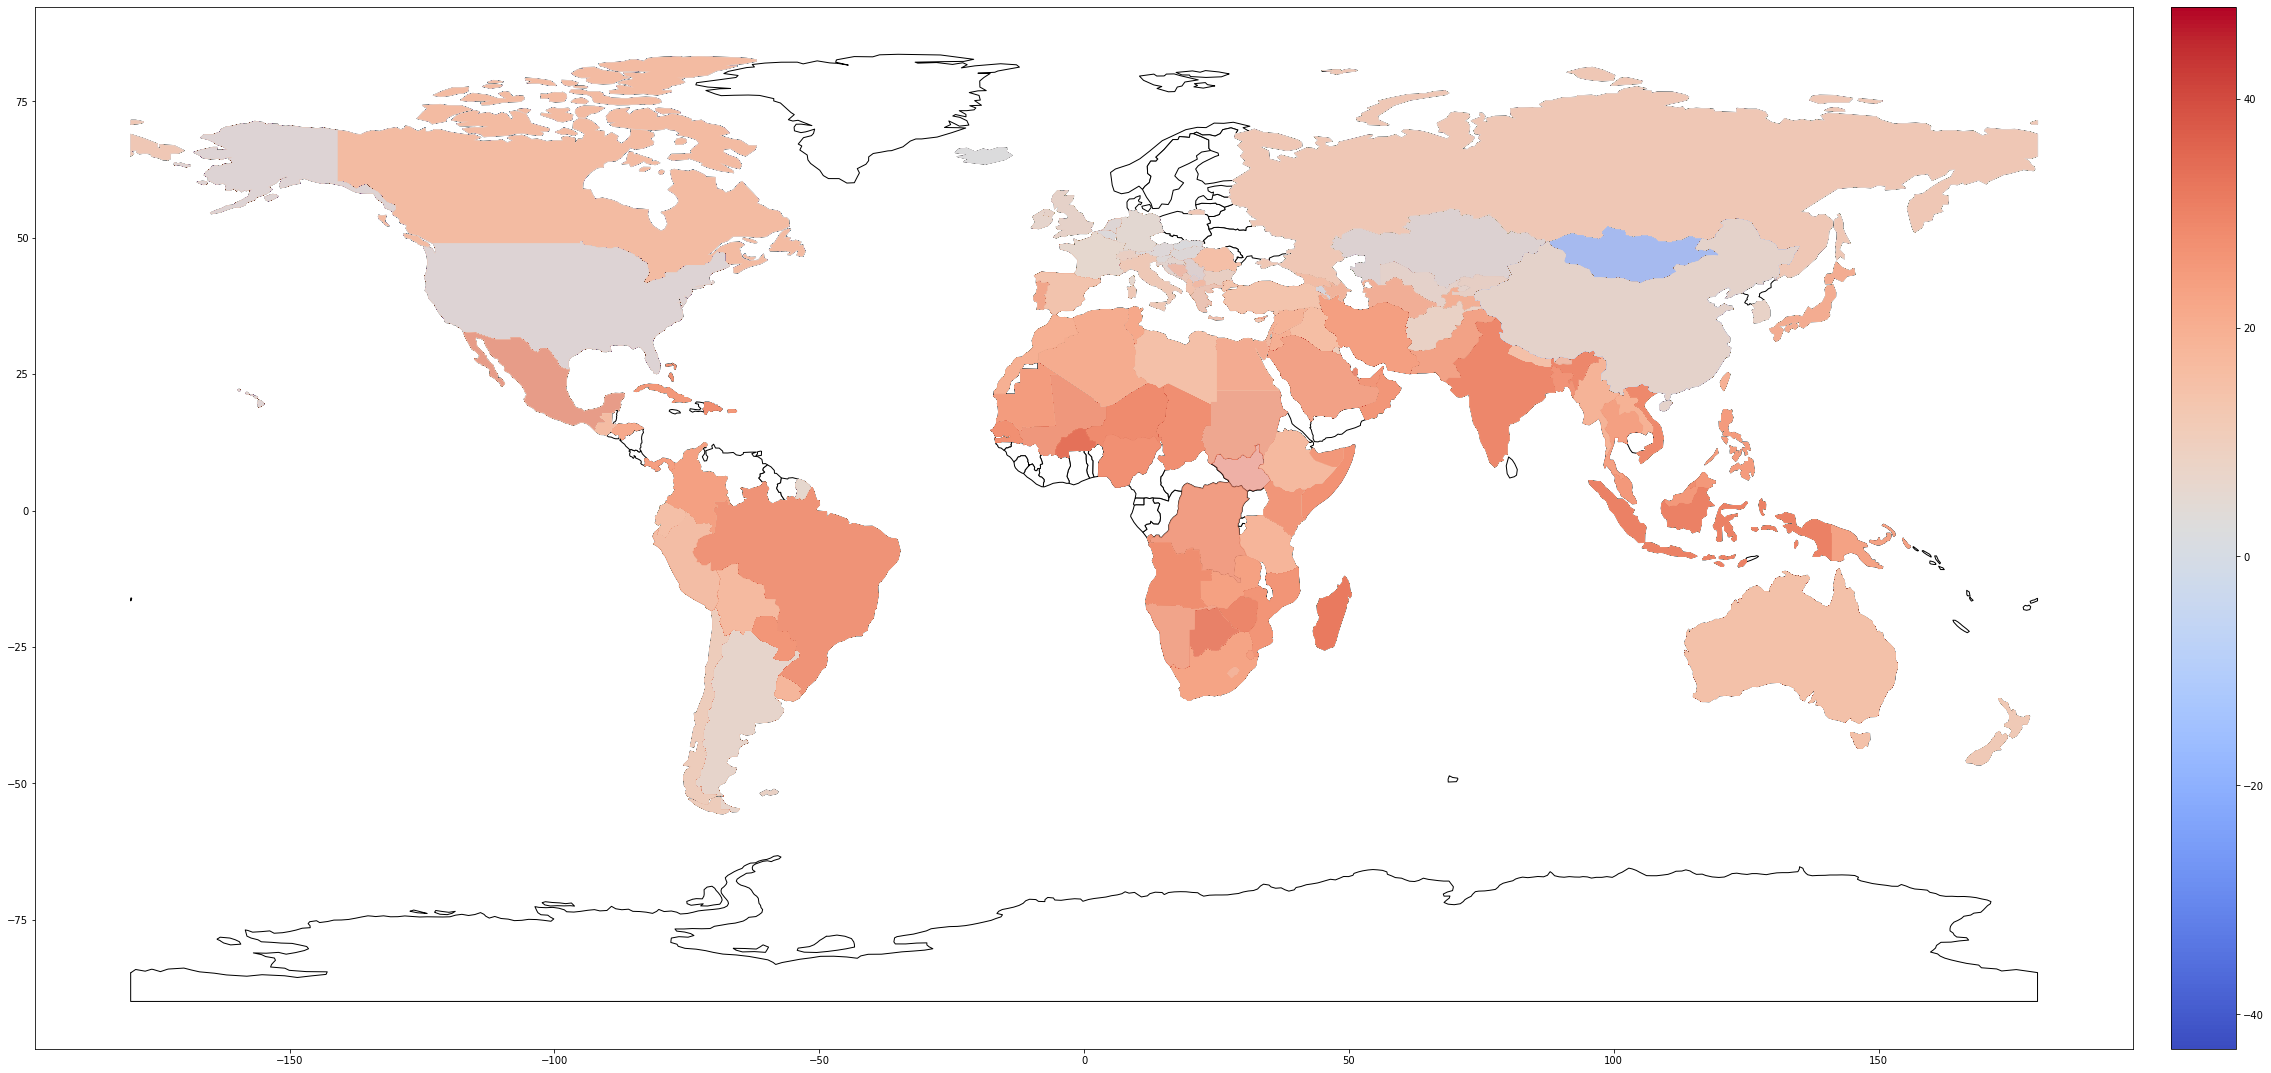

In [44]:
gdf = gdf.set_crs('epsg:4326')
world_joined = world.sjoin(gdf, predicate = "intersects")
ax = world.plot(
    color='white', edgecolor='black',figsize=[40,40])
divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="3%", pad=0.1)
world_joined.plot(column='fact_temperature', ax=ax, legend=True, cax=cax, cmap="coolwarm",figsize=[40,40],alpha=0.5)

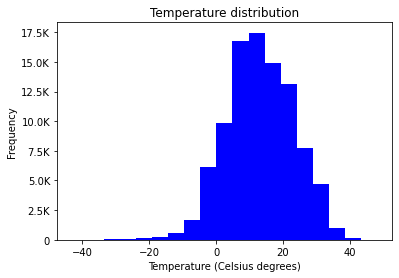

In [ ]:
# plotting the distribution of the target
fig, ax = plt.subplots()
hist(ax, df_numerical.select(col("fact_temperature")), bins = 19, color=['blue'])
plt.title("Temperature distribution")
plt.ylabel("Frequency")
plt.xlabel("Temperature (Celsius degrees)")
plt.show()

# 4. Data Preprocessing

### 1. Splitting data into train and test

In [ ]:
train, test_set = df_numerical.randomSplit([.8, .2], seed = 42)

### 2. Splitting data for crossvalidation

In [ ]:
train_1, train_2,train_3 = train.randomSplit([.3,.3,.3], seed = 42)

In [ ]:
train_list = [train_1,train_2,train_3]

### 3. Creating vectors

In [ ]:
#creating vector for each feature set
def vector_creator(train_set,validation_set):
  train_set_x = train_set.drop("index","fact_temperature","cmc_available","wrf_available","gfs_available","gfs_soil_temperature_available")
  train_set_y = train_set.select(col("fact_temperature"))
  vector_col = "features"

  train_assembler = VectorAssembler(inputCols=train_set_x.columns, outputCol=vector_col)
  train_vector = train_assembler.transform(train_set_x).select(vector_col)

  validation_set_x = validation_set.drop("index","fact_temperature","cmc_available","wrf_available","gfs_available","gfs_soil_temperature_available")
  validation_set_y = validation_set.select(col("fact_temperature"))
  validation_assembler = VectorAssembler(inputCols=validation_set_x.columns, outputCol=vector_col)
  validation_vector = validation_assembler.transform(validation_set_x).select(vector_col)

  return train_vector,train_set_y,validation_vector,validation_set_y

In [ ]:
train_1_x, train_1_y ,validation_1_x, validation_1_y = vector_creator(train_1.union(train_2), train_3)
train_2_x, train_2_y ,validation_2_x, validation_2_y = vector_creator(train_2.union(train_3), train_1)
train_3_x, train_3_y ,validation_3_x, validation_3_y = vector_creator(train_3.union(train_1), train_2)

In [ ]:
train_vector, train_set_y, test_vector, test_set_y = vector_creator(train,test_set)

### 4. Applying PCA to extract features

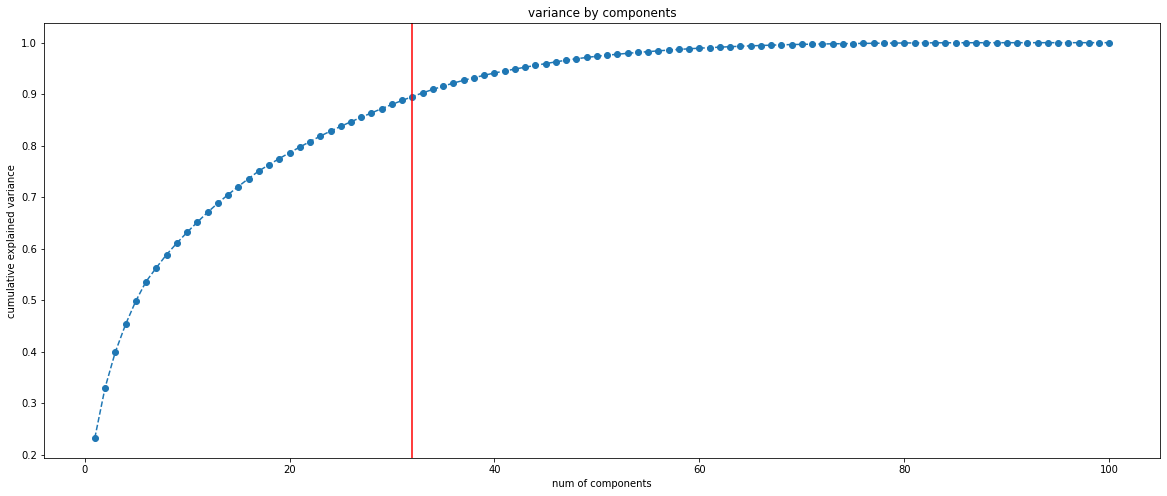

In [ ]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=True)
scalerModel = scaler.fit(train_vector)
train_scaled = scalerModel.transform(train_vector)
pca = PCA(k=100, inputCol="scaledFeatures", outputCol="pca")
model_pca = pca.fit(train_scaled)
cumValues = model_pca.explainedVariance.cumsum() # get the cumulative values
varianceX =0
for i in range(len(cumValues)):
  if cumValues[i]>0.9:
    varianceX = i
    break
plt.figure(figsize=(20,8))
plt.plot(range(1,len(model_pca.explainedVariance)+1), cumValues, marker = 'o', linestyle='--')
plt.title('variance by components')
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance')
plt.axvline(x = varianceX, color = 'r', label = 'axvline - full height')


### 5. Creating pipeline for preprocessing

In [ ]:
def scaler_pca_pipeline_creator(train_x):
  pipeline_scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=True)
  pipeline_pca = PCA(k=5, inputCol="scaledFeatures", outputCol="pca")
  pipeline = Pipeline(stages = [pipeline_scaler,pipeline_pca])
  pipeline_model = pipeline.fit(train_x)
  return pipeline_model

In [ ]:
crossvalidation_train_x = [train_1_x,train_2_x,train_3_x]
crossvalidation_train_y = [train_1_y,train_2_y,train_3_y]
crossvalidation_validation_x = [validation_1_x, validation_2_x, validation_3_x]
crossvalidation_validation_y = [validation_1_y, validation_2_y, validation_3_y]
crossvalidation_train_x_pipeline = []
crossvalidation_train_x_transformed = []
crossvalidation_validation_x_transformed = []

#fitting the pipeline
for elem in crossvalidation_train_x:
  crossvalidation_train_x_pipeline.append(scaler_pca_pipeline_creator(elem))

# scaling and creating pca using the pipeline
for i in range(len(crossvalidation_train_x)):
  crossvalidation_train_x_transformed.append(crossvalidation_train_x_pipeline[i].transform(crossvalidation_train_x[i]))
  crossvalidation_validation_x_transformed.append(crossvalidation_train_x_pipeline[i].transform(crossvalidation_validation_x[i]))

In [ ]:
train_pipeline = scaler_pca_pipeline_creator(train_vector)
train_pca = train_pipeline.transform(train_vector)
test_pca = train_pipeline.transform(test_vector)

In [ ]:
def merging(train_pca,train_set_y):
  train_merged=train_pca.select(col("pca")).withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
  train_set_y_temp=train_set_y.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
  train_merged = train_merged.join(train_set_y_temp, on="row_index", how="outer").drop("row_index")
  return train_merged

In [ ]:
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="fact_temperature",metricName="rmse")

In [ ]:
train_list = []
for i in range(len(crossvalidation_train_x_transformed)):
  train_list.append([merging(crossvalidation_train_x_transformed[i],crossvalidation_train_y[i]),merging(crossvalidation_validation_x_transformed[i],crossvalidation_validation_y[i])])

In [ ]:
train_merged = merging(train_pca,train_set_y)
test_merged = merging(test_pca,test_set_y)

# 5. Training models

In [ ]:
def plot_results(y_pred,y_true, model):

  plt.figure()
  plt.plot(y_pred, label='predicted')
  plt.plot(y_true, label='actual')
  plt.ylabel('Temperature')
  plt.legend()
  plt.title('Predicted and true labels for '+model+' :')
  #get current axes
  ax = plt.gca()
  #hide x-axis
  ax.get_xaxis().set_visible(False)
  plt.show()


def plot_errors(train_errors,validation_errors):


  names = ["LR_Ridge&Lasso","LR_Ridge","LR_Lasso", "RF", "XGB"] #Order to change if needed


  fig=plt.figure()
  ax = fig.add_axes([0,0,1,1])

  X=np.arange(5)
  ax.bar(X+0.25 , train_errors, width = 0.25)
  ax.bar(X+0.5 , validation_errors, width = 0.25)
  ax.legend(labels=['Train Accuracy', 'Test Accuracy'])
  plt.xticks(X+0.25,names)
  plt.xlabel('Models')
  plt.ylabel('Error')
  plt.title('Train and validation errors for different models :')
  plt.show()




In [ ]:
aggregated_train_errors = []
aggregated_validation_errors = []

### 1. Training linear regression model with Ridge and Lasso using Crossvalidation

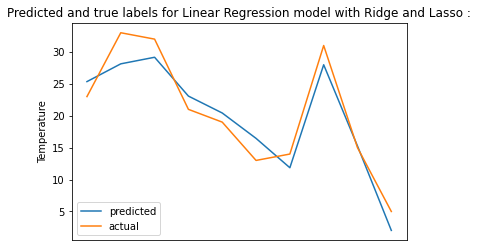

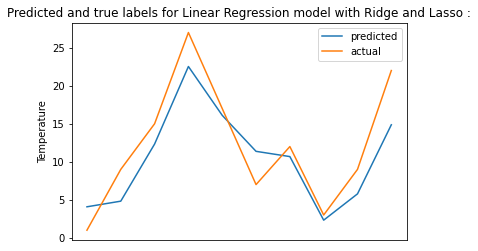

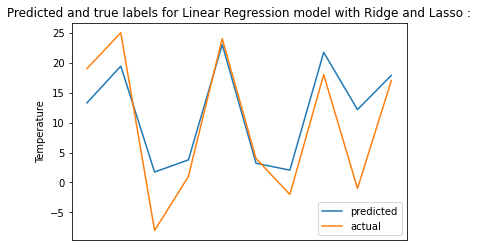

Crossvalidation error: 4.475464310715406


In [ ]:
validation_array = []
train_array = []
for train_merged,validation_merged in train_list:
  lr = LinearRegression(featuresCol = 'pca', labelCol='fact_temperature', maxIter=10, regParam=0.3, elasticNetParam=0.5)
  lrModel = lr.fit(train_merged)

  validation_output = lrModel.transform(validation_merged)
  plot_results(validation_output.select(col("prediction")).limit(10).collect(),validation_output.select(col("fact_temperature")).limit(10).collect(),"Linear Regression model with Ridge and Lasso")
  validation_array.append(lr_evaluator.evaluate(validation_output))
  train_array.append(lr_evaluator.evaluate(lrModel.transform(train_merged)))

aggregated_validation = sum(validation_array)/len(validation_array)
aggregated_validation_errors.append(aggregated_validation)
aggregated_train_errors.append(sum(train_array)/len(train_array))

print("Crossvalidation error:", aggregated_validation)

### 2. Training linear regression model with only Ridge using Crossvalidation

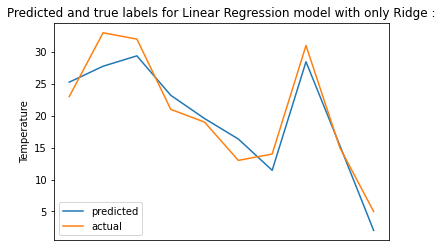

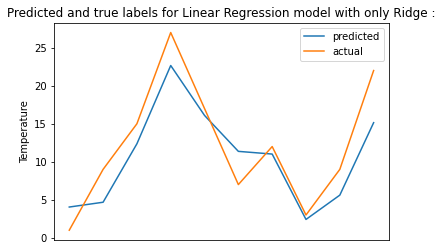

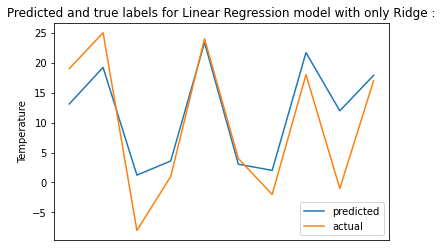

Crossvalidation error: 4.462861996823198


In [ ]:
# LINEAR REGRESSION MODEL ONLY RIDGE
validation_array = []
train_array = []
for train_merged,validation_merged in train_list:
  lr = LinearRegression(featuresCol = 'pca', labelCol='fact_temperature', maxIter=10, regParam=0.3, elasticNetParam=0.0)
  lrModel = lr.fit(train_merged)

  validation_output = lrModel.transform(validation_merged)
  plot_results(validation_output.select(col("prediction")).limit(10).collect(),validation_output.select(col("fact_temperature")).limit(10).collect(),"Linear Regression model with only Ridge")

  validation_array.append(lr_evaluator.evaluate(validation_output))
  train_array.append(lr_evaluator.evaluate(lrModel.transform(train_merged)))

aggregated_validation = sum(validation_array)/len(validation_array)
aggregated_validation_errors.append(aggregated_validation)
aggregated_train_errors.append(sum(train_array)/len(train_array))

print("Crossvalidation error:", aggregated_validation)

### 3. Training linear regression model with only Lasso using Crossvalidation

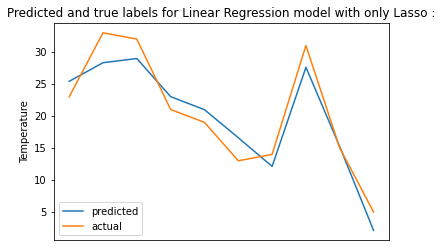

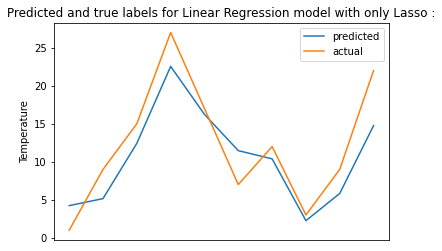

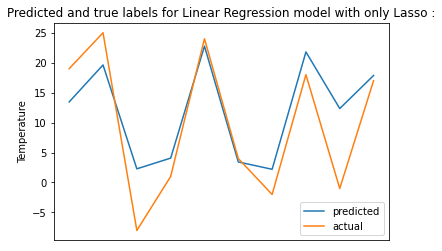

Crossvalidation error: 4.499614764515931


In [ ]:
# LINEAR REGRESSION MODEL ONLY LASSO
validation_array = []
train_array = []

for train_merged,validation_merged in train_list:
  lr = LinearRegression(featuresCol = 'pca', labelCol='fact_temperature', maxIter=10, regParam=0.3, elasticNetParam=1.0)
  lrModel = lr.fit(train_merged)


  validation_output = lrModel.transform(validation_merged)
  plot_results(validation_output.select(col("prediction")).limit(10).collect(),validation_output.select(col("fact_temperature")).limit(10).collect(),"Linear Regression model with only Lasso")

  validation_array.append(lr_evaluator.evaluate(validation_output))
  train_array.append(lr_evaluator.evaluate(lrModel.transform(train_merged)))

aggregated_validation = sum(validation_array)/len(validation_array)
aggregated_validation_errors.append(aggregated_validation)
aggregated_train_errors.append(sum(train_array)/len(train_array))

print("Crossvalidation error:", aggregated_validation)

### 4. Training random forest model using Crossvalidation

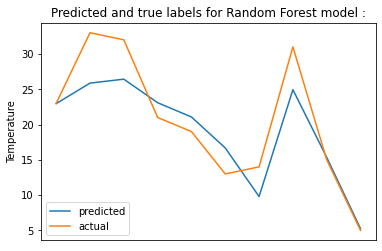

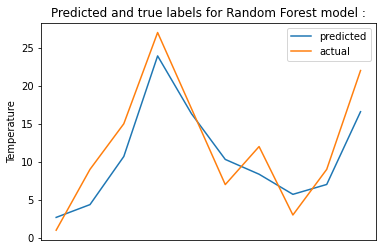

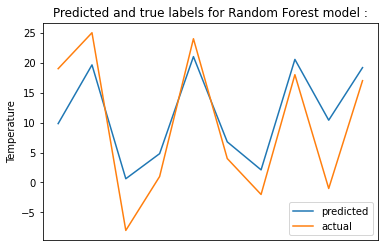

Crossvalidation error: 4.923877461901906


In [40]:
#RANDOM FOREST MODEL

training_array = []
validation_array = []
for train_merged,validation_merged in train_list:
  rf = RandomForestRegressor(featuresCol = 'pca', labelCol='fact_temperature')
  rfModel = rf.fit(train_merged)
  training_array.append(lr_evaluator.evaluate(rfModel.transform(train_merged)))
  validation_output = rfModel.transform(validation_merged)
  plot_results(validation_output.select(col("prediction")).limit(10).collect(),validation_output.select(col("fact_temperature")).limit(10).collect(),"Random Forest model")
  validation_array.append(lr_evaluator.evaluate(validation_output))

aggregated_validation = sum(validation_array)/len(validation_array)
aggregated_training = sum(training_array)/len(training_array)
aggregated_validation_errors.append(aggregated_validation)
aggregated_train_errors.append(aggregated_training)

print("Crossvalidation error:", aggregated_validation)

### 5. Training gradient boosting model using Crossvalidation

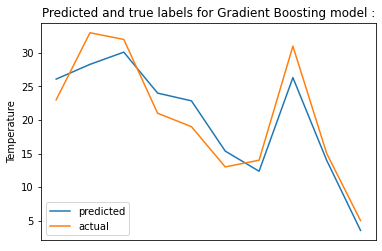

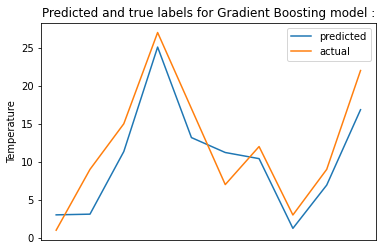

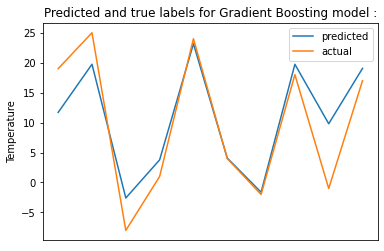

Crossvalidation error: 4.434747892737629


In [41]:
#GRADIENT BOOSTING MODEL

training_array = []
validation_array = []
for train_merged,validation_merged in train_list:
  gbt = GBTRegressor(featuresCol = 'pca', labelCol='fact_temperature', maxIter=10)
  gbtModel = gbt.fit(train_merged)
  training_array.append(lr_evaluator.evaluate(gbtModel.transform(train_merged)))
  validation_output = gbtModel.transform(validation_merged)
  plot_results(validation_output.select(col("prediction")).limit(10).collect(),validation_output.select(col("fact_temperature")).limit(10).collect(),"Gradient Boosting model")
  validation_array.append(lr_evaluator.evaluate(validation_output))
  
aggregated_validation = sum(validation_array)/len(validation_array)
aggregated_training = sum(training_array)/len(training_array)
aggregated_validation_errors.append(aggregated_validation)
aggregated_train_errors.append(aggregated_training)

print("Crossvalidation error:", aggregated_validation)

### 6. Visualizing Crossvalidation results

[4.475031285833297, 4.462401228743484, 4.499265331214561, 4.902236996381073, 4.377477702830377]
[4.475464310715406, 4.462861996823198, 4.499614764515931, 4.923877461901906, 4.434747892737629]


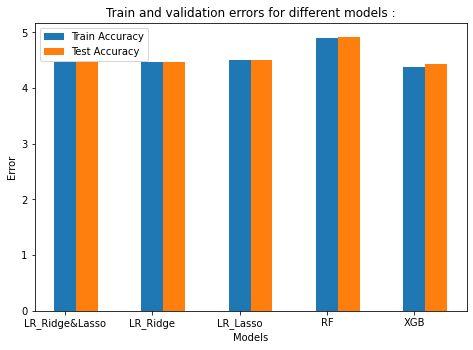

In [42]:
print(aggregated_train_errors)
print(aggregated_validation_errors)
plot_errors(aggregated_train_errors,aggregated_validation_errors)

### 7. Training the best model

In [43]:
# Gradient Boosting
gbt = GBTRegressor(featuresCol = 'pca', labelCol='fact_temperature', maxIter=10)
gbtModel = gbt.fit(train_merged)
print("RMSE on training data = %g" % lr_evaluator.evaluate(gbtModel.transform(train_merged)))
print("RMSE on test data = %g" % lr_evaluator.evaluate(gbtModel.transform(test_merged)))

RMSE on training data = 4.38385
RMSE on test data = 4.41304
